In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
df=pd.read_csv("parkinsons.csv")

In [6]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
df.shape

(195, 24)

In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Distribution of target

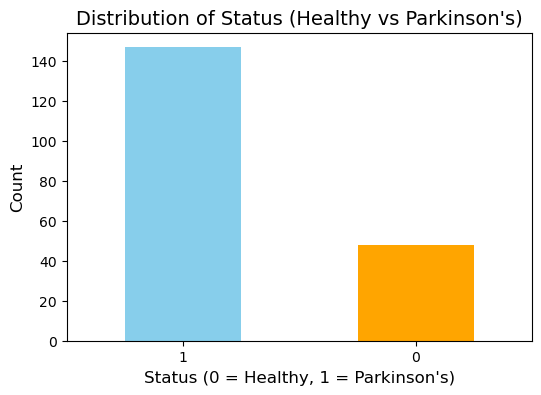

In [12]:
class_counts = df['status'].value_counts()

# Plot using Matplotlib
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Status (Healthy vs Parkinson's)", fontsize=14)
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# PRE PROCESSING

In [14]:
x=df.drop(columns=['name','status'],axis=1)
y=df['status'];

In [15]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [16]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
print(x.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


# DATA Standardization

In [20]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [21]:
x_train =scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
print(x_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


# Logistic Regression

In [24]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pre=log.predict(x_train)


In [26]:
accuracy_score(y_train,y_pre)

0.8717948717948718

In [27]:
y_predict1=log.predict(x_test)

In [28]:
accuracy_score(y_test,y_predict1)

0.8205128205128205

In [29]:
precision = precision_score(y_test, y_predict1)
recall = recall_score(y_test, y_predict1) 
f1 = f1_score(y_test, y_predict1)  

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9
Recall: 0.8709677419354839
F1 Score: 0.8852459016393442


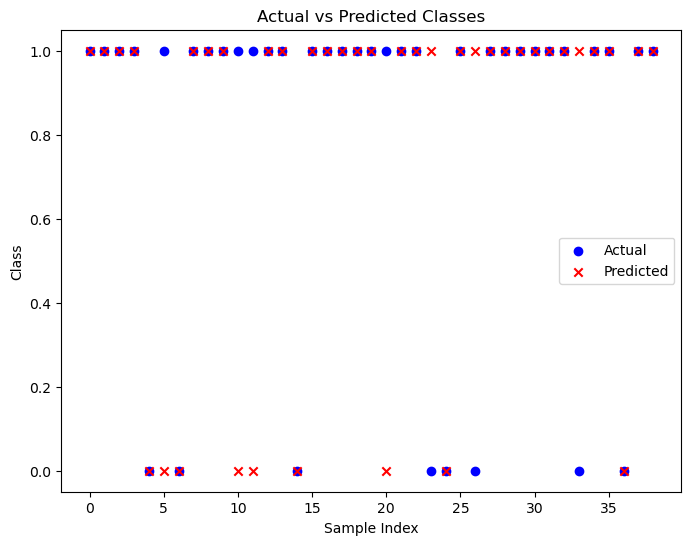

In [30]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_predict1)), y_predict1, color="red", label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Actual vs Predicted Classes")
plt.legend()
plt.show()


# SVC

In [32]:
svm=svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [33]:
y_predict2 = svm.predict(x_test)

In [34]:
accuracy_score(y_test,y_predict2)

0.8974358974358975

In [35]:
precision = precision_score(y_test, y_predict2)
recall = recall_score(y_test, y_predict2) 
f1 = f1_score(y_test, y_predict2)  

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8857142857142857
Recall: 1.0
F1 Score: 0.9393939393939394


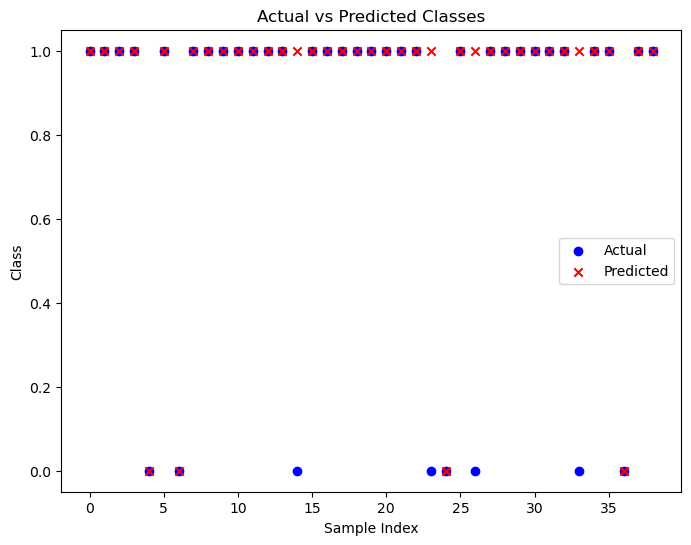

In [36]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_predict2)), y_predict2, color="red", label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Actual vs Predicted Classes")
plt.legend()
plt.show()


# Random Forest Classifier

In [38]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
y_predict3 = rf.predict(x_test)

In [40]:
accuracy_score(y_test,y_predict3)

0.8205128205128205

In [41]:
precision = precision_score(y_test, y_predict3)
recall = recall_score(y_test, y_predict3) 
f1 = f1_score(y_test, y_predict3)  

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9
Recall: 0.8709677419354839
F1 Score: 0.8852459016393442


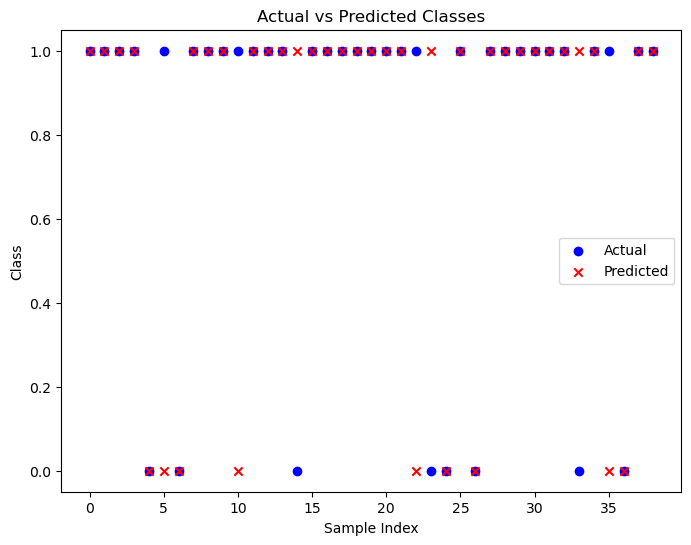

In [42]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_predict3)), y_predict3, color="red", label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Actual vs Predicted Classes")
plt.legend()
plt.show()


# XGBClassifier

In [44]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_predict4= xgb.predict(x_test)

In [46]:
accuracy_score(y_test,y_predict4)

0.8717948717948718

In [47]:
precision = precision_score(y_test, y_predict4)
recall = recall_score(y_test, y_predict4) 
f1 = f1_score(y_test, y_predict4)  

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9642857142857143
Recall: 0.8709677419354839
F1 Score: 0.9152542372881356


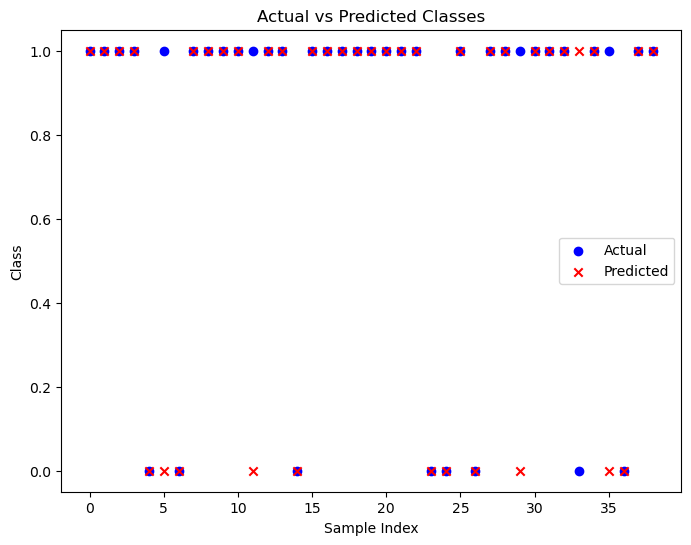

In [48]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_predict4)), y_predict4, color="red", label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Actual vs Predicted Classes")
plt.legend()
plt.show()


In [49]:
final_data=pd.DataFrame({'Models':['LR','SVM','RF','XGB'],'ACC':[accuracy_score(y_test,y_predict1),accuracy_score(y_test,y_predict2),accuracy_score(y_test,y_predict3),accuracy_score(y_test,y_predict4),]})
print(final_data)

  Models       ACC
0     LR  0.820513
1    SVM  0.897436
2     RF  0.820513
3    XGB  0.871795


In [50]:
final_data=pd.DataFrame({
    'Model':['LR','SVM','RF','XGB'],
    'Accuracy':[
      accuracy_score(y_test,y_predict1),  
      accuracy_score(y_test,y_predict2),  
      accuracy_score(y_test,y_predict3),  
      accuracy_score(y_test,y_predict4)  
    ],
    'Precision':[
        precision_score(y_test,y_predict1),
        precision_score(y_test,y_predict2),
        precision_score(y_test,y_predict3),
        precision_score(y_test,y_predict4)
    ],
    'Recall':[
        recall_score(y_test,y_predict1),
        recall_score(y_test,y_predict2),
        recall_score(y_test,y_predict3),
        recall_score(y_test,y_predict4)
    ],
    'F1 Score':[
        f1_score(y_test,y_predict1),
        f1_score(y_test,y_predict2),
        f1_score(y_test,y_predict3),
        f1_score(y_test,y_predict4)
    ],
})
print(final_data)

  Model  Accuracy  Precision    Recall  F1 Score
0    LR  0.820513   0.900000  0.870968  0.885246
1   SVM  0.897436   0.885714  1.000000  0.939394
2    RF  0.820513   0.900000  0.870968  0.885246
3   XGB  0.871795   0.964286  0.870968  0.915254


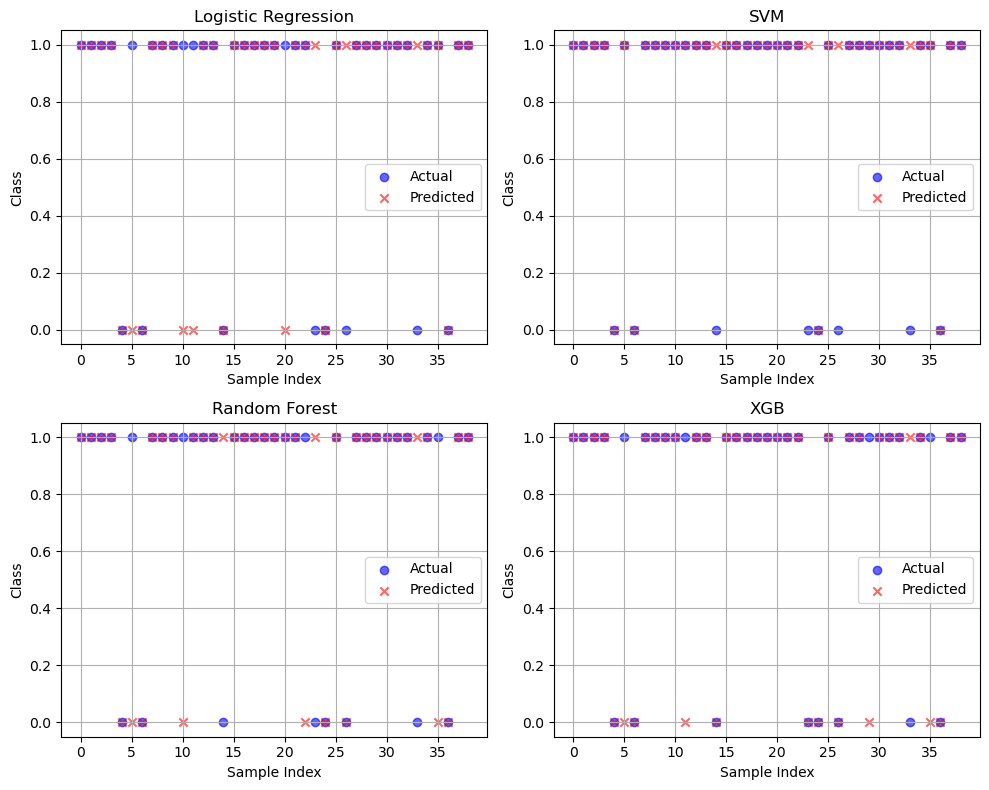

In [53]:
algo_names = ["Logistic Regression", "SVM", "Random Forest", "XGB"]

# Define predictions list
predictions = [y_predict1, y_predict2, y_predict3, y_predict4]

# Create subplots (2 rows, 2 columns for 4 algorithms)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Change to 2x2 grid
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each algorithm and its corresponding subplot
for i, ax in enumerate(axes):
    ax.scatter(range(len(y_test)), y_test, color="blue", label="Actual", alpha=0.6)
    ax.scatter(range(len(predictions[i])), predictions[i], color="red", marker="x", label="Predicted", alpha=0.6)
    ax.set_title(algo_names[i])
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Class")
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure
plt.show()